In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from flows import *
from load_data import *
from utl import *

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()
sess = tf1.InteractiveSession()

In [2]:
NP_DTYPE=np.float32
num_bijectors = 6

## Target Density

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


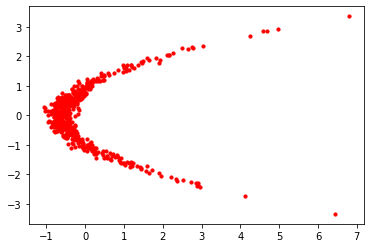

In [3]:
X_data = load_single_moon_dataset(1000)
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, color='red')

## Construct Flow

In [4]:
base_dist = tfd.MultivariateNormalDiag(loc=tf1.zeros([2], tf1.float32))
flow = mlp_flow(base_dist, 2, num_bijectors)

Instructions for updating:
`Affine` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Matvec*)` where `tfb.Matvec*` is one of `MatvecDiag`, `MatvecTriL`, or `MatvecLinearOperator`.
Instructions for updating:
Do not call `graph_parents`.


In [5]:
# visualization
x = base_dist.sample(512)
samples = [x]
names = [base_dist.name]
for bijector in reversed(flow.bijector.bijectors):
    x = bijector.forward(x)
    samples.append(x)
    names.append(bijector.name)

In [6]:
sess.run(tf1.global_variables_initializer())

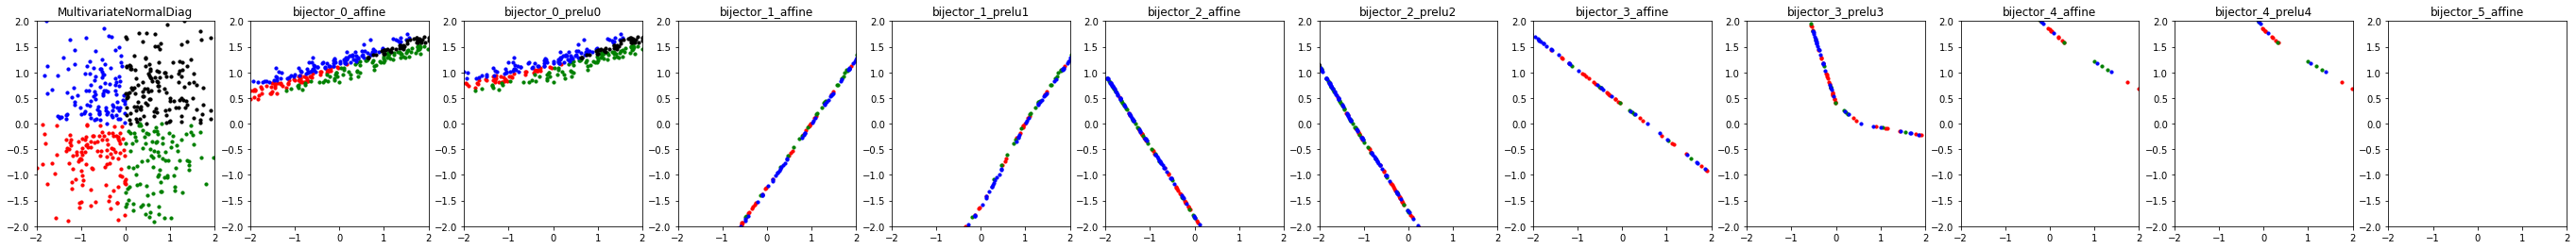

In [7]:
results = sess.run(samples)
f, arr = plt.subplots(1, len(results), figsize=(4 * (len(results)), 4))
X0 = results[0]
for i in range(len(results)):
    X1 = results[i]
    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] < 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='red')
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] < 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='green')
    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] > 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='blue')
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] > 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='black')
    arr[i].set_xlim([-2, 2])
    arr[i].set_ylim([-2, 2])
    arr[i].set_title(names[i])

In [8]:
loss = -tf1.reduce_mean(flow.log_prob(X_data))
train_op = tf1.train.AdamOptimizer(1e-3).minimize(loss)

In [9]:
sess.run(tf1.global_variables_initializer())

0 296021.3
10000 3.37231
20000 2.8491142
30000 2.8369832
40000 2.8369412


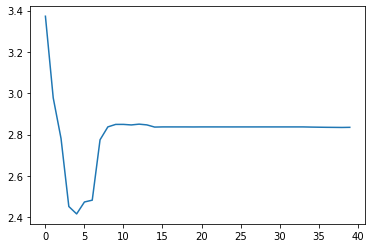

In [10]:
NUM_STEPS = int(5e4)
global_step = []
np_losses = []
for i in range(NUM_STEPS):
    _, np_loss = sess.run([train_op, loss])
    if i % 1000 == 0:
        global_step.append(i)
        np_losses.append(np_loss)
    if i % int(1e4) == 0:
        print(i, np_loss)
start = 10
plt.plot(np_losses[start:])

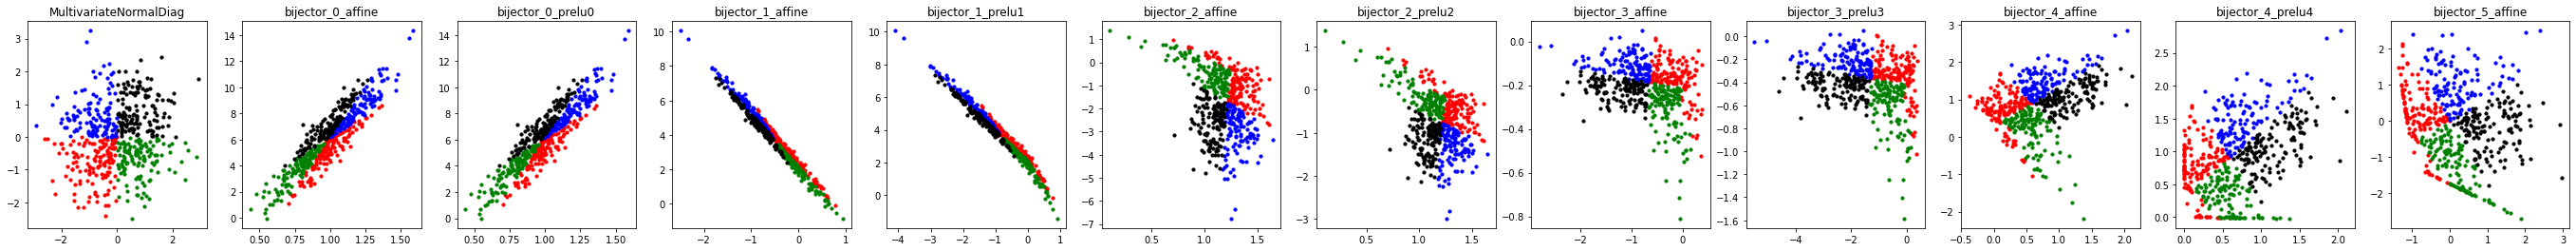

In [11]:
results = sess.run(samples)
f, arr = plt.subplots(1, len(results), figsize=(4 * (len(results)), 4))
X0 = results[0]
for i in range(len(results)):
    X1 = results[i]
    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] < 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='red')
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] < 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='green')
    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] > 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='blue')
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] > 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='black')
    arr[i].set_title(names[i])

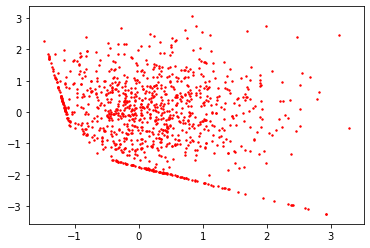

In [12]:
X1 = sess.run(flow.sample(1000))
plt.scatter(X1[:, 0], X1[:, 1], color='red', s=2)